# Simulated Data

In [71]:
%reload_ext autoreload
%autoreload 2

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simulation import eular_sim, portfolio_process

In [73]:
np.random.seed(11)

In [74]:
mu = 0.3 # given
sigma = 0.1 # given
theta = 1 # given
k = 5 # given
eta = 0.5 # given
rho = 0.19 # given
B0 = 50
X0 = 1
V0 = 1000
r = 0.02
T = 5
gamma = -800

In [75]:
A, B, X = eular_sim(B0, mu, sigma, X0, k, theta, eta, rho, 5, N=251 * 5)

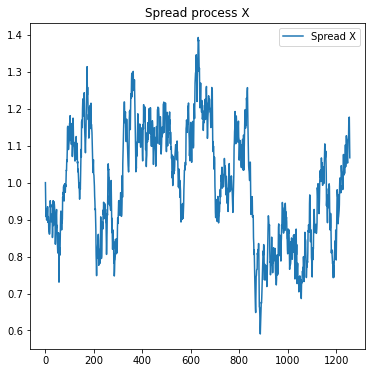

In [76]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(X, label="Spread X")
ax.legend()
ax.set_title("Spread process X")
plt.show()

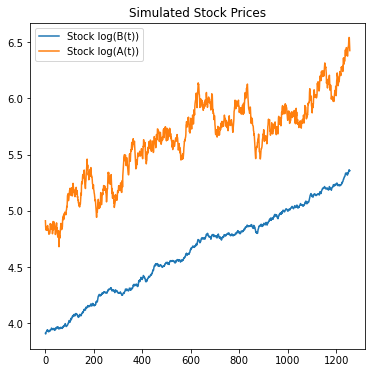

In [77]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(np.log(B), label="Stock log(B(t))")
ax.plot(np.log(A), label="Stock log(A(t))")
ax.legend()
ax.set_title("Simulated Stock Prices")
plt.show()

In [78]:
pv, h_weights = portfolio_process(A, B, X, V0, r, T, k, gamma, eta, sigma, rho, theta)

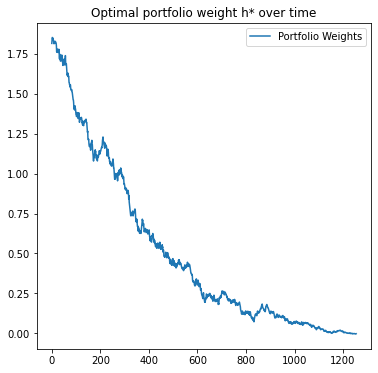

In [79]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(h_weights, label="Portfolio Weights")
ax.legend()
ax.set_title("Optimal portfolio weight h* over time")
plt.show()

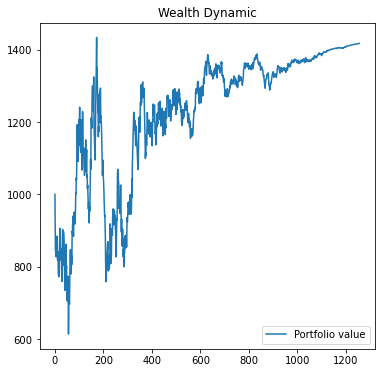

In [80]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(pv, label="Portfolio value")
ax.legend()
ax.set_title("Wealth Dynamic")
plt.show()

In [81]:
final_wealth = []
for i in range(50):
    A, B, X = eular_sim(B0, mu, sigma, X0, k, theta, eta, rho, 5, N=251 * 5)
    pv, h_weights = portfolio_process(A, B, X, V0, r, T, k, gamma, eta, sigma, rho, theta)
    final_wealth.append(pv[-1])

No handles with labels found to put in legend.


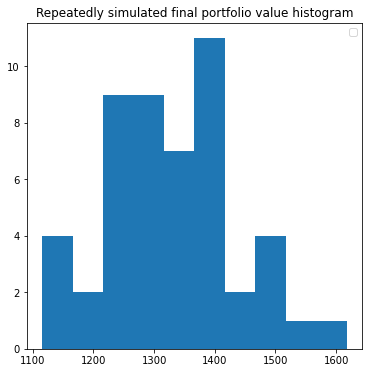

In [82]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.hist(final_wealth)
ax.legend()
ax.set_title("Repeatedly simulated final portfolio value histogram")
plt.show()

In [83]:
np.mean(final_wealth)

1328.6001614155803